In [76]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
dia=pd.read_csv("Diabetes.csv")
dia.head()
dia['output']="NAN"
dia.head()
dia.shape

(768, 10)

In [3]:
for i in range(len(dia.index)):
    if dia['Glucose'][i]>125:
        dia['output'][i]="diabetic"
    elif 100<=dia['Glucose'][i]>=125:
        dia['output'][i]="prediabetic"
    else: 
        dia['output'][i]="normal"

In [4]:
# or else we can us applu function
dia.head()
count=(dia['Insulin']==0).sum()
print(count)

374


In [5]:
dia1=dia.copy()

In [6]:
dia1['output']=dia1['Glucose'].apply(lambda x:'diabetes' if x>125 else 'prediabetic' if 100<=x<=125 else 'normal')

In [7]:
dia1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,output
0,6,148,72,35,0,33.6,0.627,50,1,diabetes
1,1,85,66,29,0,26.6,0.351,31,0,normal
2,8,183,64,0,0,23.3,0.672,32,1,diabetes
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,diabetes


In [8]:
dia['output']=dia['output'].replace('normal',0)
dia['output']=dia['output'].replace('prediabetic',1)
dia['output']=dia['output'].replace('diabetic',2)


In [9]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [10]:
#or else we can use dictinaries
dia1.replace({'output':{'normal':0,'prediabetic':1,'diabetes':2,}})


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,2


In [11]:

dia['Glucose']=dia[ 'Glucose'].replace(0,np.NAN)
dia.dropna(inplace=True)


In [12]:
dia.shape

(763, 10)

In [13]:
dia=dia[['Glucose','Insulin','output']]

In [14]:
dia.to_csv('diabetes22.csv',index=False)

In [15]:
dia2=pd.read_csv("Diabetes.csv")
dia2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data=dia2[['Glucose','Insulin','Outcome']]
data.shape

(768, 3)

In [17]:
data['Glucose']=data[ 'Glucose'].replace(0,np.NAN)
data.dropna(inplace=True)

data.to_csv("diabetis22.csv",index=False)

In [18]:
data.head()

,Glucose,Insulin,Outcome
0,148.0,0,1
1,85.0,0,0
2,183.0,0,1
3,89.0,94,0
4,137.0,168,1


In [19]:
fr=data[data['Insulin']==0]
fr.to_csv('predict.csv',index=False)
sr=fr.iloc[:,fr.columns!='Insulin']
sr

,Glucose,Outcome
0,148.0,1
1,85.0,0
2,183.0,1
5,116.0,0
7,115.0,0
...,...,...
761,170.0,1
762,89.0,0
764,122.0,0
766,126.0,1


In [20]:
kr=data[data['Insulin']!=0]
kr.head()

,Glucose,Insulin,Outcome
3,89.0,94,0
4,137.0,168,1
6,78.0,88,1
8,197.0,543,1
13,189.0,846,1


In [21]:
x=kr.loc[:,kr.columns!='Insulin']
y=kr.drop(['Glucose','Outcome'],axis=1)
y.shape

(393, 1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error,mean_absolute_error,classification_report

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [24]:
ref=LinearRegression()
model=ref.fit(x_train,y_train)

y_pred=ref.predict(x_test)
print(y_pred,y_test)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

[[188.94602561]
 [167.8478944 ]
 [191.29026241]
 [210.85417935]
 [231.14228802]
 [174.8806048 ]
 [174.8806048 ]
 [295.24670418]
 [104.55350077]
 [106.89773757]
 [158.47094719]
 [ 74.07842236]
 [167.8478944 ]
 [186.60178881]
 [196.78875854]
 [167.8478944 ]
 [227.26383695]
 [135.83860172]
 [238.98502096]
 [166.31368013]
 [240.51923523]
 [104.55350077]
 [160.815184  ]
 [ 60.82302409]
 [213.19841615]
 [128.80589132]
 [ 45.94758075]
 [314.00059859]
 [ 78.76689596]
 [104.55350077]
 [ 69.38994876]
 [170.1921312 ]
 [106.89773757]
 [127.99586878]
 [109.24197437]
 [281.18128338]
 [215.54265295]
 [ 92.83231677]
 [ 95.17655357]
 [106.89773757]
 [278.83704658]
 [311.65636179]
 [149.09399999]
 [233.48652482]
 [224.10957762]
 [212.38839362]
 [120.96315838]
 [146.74976319]
 [139.71705279]
 [250.70620496]
 [113.93044798]
 [135.02857918]
 [117.08470731]
 [177.2248416 ]
 [170.1921312 ]
 [207.69992001]
 [ 38.91487035]
 [ 67.04571196]
 [ 78.76689596]
 [144.40552639]
 [106.89773757]
 [210.04415681]
 [107.70

In [25]:
model.score(x_train,y_train)

0.3465317922908909

In [26]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.1986203328248607
6212.247926662154


In [27]:
newdf=pd.DataFrame([[144,2]])
prediction=ref.predict(newdf)
print(prediction.astype(int))

[[211]]


In [28]:
insulin=ref.predict(sr)
##print(insulin)

In [29]:
r=pd.read_csv('diabetes22.csv')
r

,Glucose,Insulin,output
0,148.0,0,2
1,85.0,0,0
2,183.0,0,2
3,89.0,94,0
4,137.0,168,2
...,...,...,...
758,101.0,180,0
759,122.0,0,0
760,121.0,112,0
761,126.0,0,2


In [30]:
l=r[r['Insulin']==0]
l

,Glucose,Insulin,output
0,148.0,0,2
1,85.0,0,0
2,183.0,0,2
5,116.0,0,0
7,115.0,0,0
...,...,...,...
756,170.0,0,2
757,89.0,0,0
759,122.0,0,0
761,126.0,0,2


In [31]:
j=0
for i in range(len(r.index)):
    if r['Insulin'][i]==0:
        r['Insulin'][i]=insulin[j]
        j=j+1

In [32]:
r.to_csv("finaldata.csv",index=False)

In [33]:
##classification



In [34]:

fina=pd.read_csv("finaldata.csv")

fina.shape


(763, 3)

In [35]:
X=fina.loc[:,fina.columns!='output']
Y=fina['output']

fina

,Glucose,Insulin,output
0,148.0,220,2
1,85.0,71,0
2,183.0,302,2
3,89.0,94,0
4,137.0,168,2
...,...,...,...
758,101.0,180,0
759,122.0,158,0
760,121.0,112,0
761,126.0,168,2


In [36]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [37]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

modal = KNeighborsClassifier()
modal.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [39]:
Y_pred=modal.predict(X_test_scaled)
##print(Y_test,Y_pred)


X_train_scaled.shape


(610, 2)

In [40]:

ac1=accuracy_score(Y_test,Y_pred)*100

<AxesSubplot:>

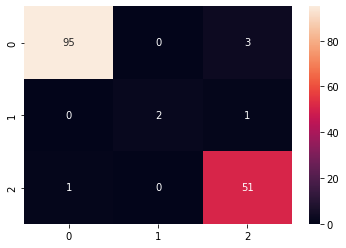

In [41]:
sb.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [42]:

from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train_scaled,Y_train)
Y_lopred=classifier7.predict(X_test_scaled)
##print(Y_test,Y_lopred)

<AxesSubplot:>

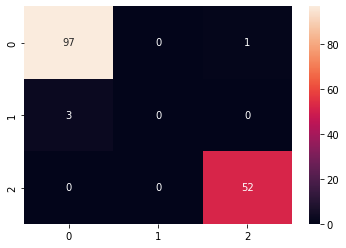

In [43]:
sb.heatmap(confusion_matrix(Y_test,Y_lopred),annot=True)

In [44]:
classification_report(Y_test,Y_lopred)

ac2=accuracy_score(Y_test,Y_lopred)*100

In [45]:

from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gausmodal = GaussianNB()

# Train the model using the training sets
gausmodal .fit(X_train_scaled,Y_train)

#Predict Output
Y_gaupred= gausmodal.predict(X_test_scaled) 

<AxesSubplot:>

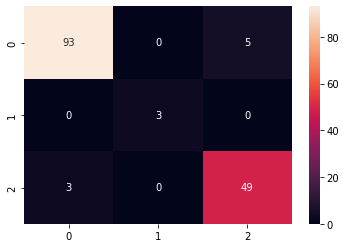

In [46]:
sb.heatmap(confusion_matrix(Y_test,Y_gaupred),annot=True)

In [47]:
classification_report(Y_test,Y_gaupred)

ac3=accuracy_score(Y_test,Y_gaupred)*100

<AxesSubplot:xlabel='output', ylabel='count'>

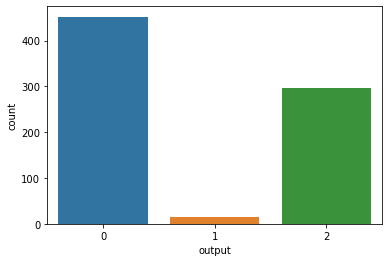

In [48]:
sb.countplot(x='output',data=fina)

In [49]:

from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [50]:
Y_de=clf_model.predict(X_test_scaled)


<AxesSubplot:>

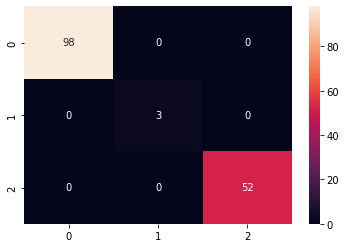

In [51]:
sb.heatmap(confusion_matrix(Y_test,Y_de),annot=True)

In [52]:
ac4=accuracy_score(Y_test,Y_de)*100

In [53]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

In [54]:
y__pred = svclassifier.predict(X_test_scaled)

<AxesSubplot:>

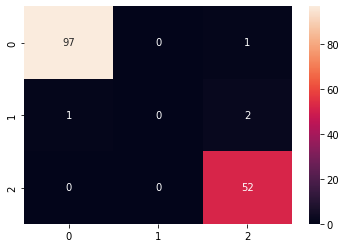

In [55]:
sb.heatmap(confusion_matrix(Y_test,y__pred),annot=True)

In [56]:
ac5=accuracy_score(Y_test,y__pred)*100


In [57]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_scaled,Y_train)

y_pred=clf.predict(X_test_scaled)


<AxesSubplot:>

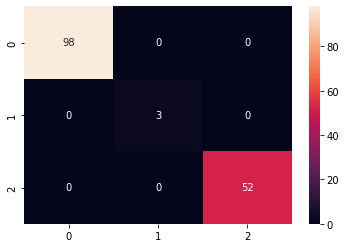

In [58]:
sb.heatmap(confusion_matrix(y_pred,Y_test),annot=True)

In [59]:
ac6=accuracy_score(Y_test,y_pred)*100

In [60]:
import pickle as pk

In [61]:
#feature scaling
pk.dump(scaler,open('scaler.pkl','wb'))
#k - neighbour
pk.dump(modal,open('modal.pkl','wb'))
#logistic
pk.dump(classifier7,open('classifier7.pkl','wb'))
#gaussiannb
pk.dump(gausmodal,open('gausmodal.pkl','wb'))
#svm
pk.dump(svclassifier,open('svclassifier.pkl','wb'))

In [62]:
sc=pk.load(open('scaler.pkl','rb'))
KAR=pk.load(open('modal.pkl','rb'))
ritesh=pk.load(open('classifier7.pkl','rb'))
likky=pk.load(open('gausmodal.pkl','rb'))
gundesh=pk.load(open('svclassifier.pkl','rb'))
results=[ac1,ac2,ac3,ac5]
names=["knn","logistic","gauunvb","svm"]

In [154]:
from tkinniter import *
import tkinter.messagebox
import customtkinter
import sys
from PIL import Image, ImageTk# <- import PIL for the images
from tkinter.ttk import *
import matplotlib as plt
#from .customtkinter_theme_manager import CTkThemeManager



customtkinter.set_appearance_mode("dark")

customtkinter.set_default_color_theme("blue")# Themes: "blue" (standard), "green", "dark-blue"

top=customtkinter.CTk()


top.geometry("720x720")
top.title("Diabetes prediction")
image = Image.open(r"C:\Users\SAI\Desktop\21600_ccexpress.png").resize((2000,1000))
bg_image = ImageTk.PhotoImage(image)
image1 = Image.open(r"C:\Users\SAI\Desktop\green-plus-icon-489361.png").resize((40,40))
bg_image1 = ImageTk.PhotoImage(image1)
image3 = Image.open(r"C:\Users\SAI\Downloads\svm_conf.png").resize((500,400))
bg_image3 = ImageTk.PhotoImage(image3)
   
def change_mode():
        if check_box_2.get() == 1:
            customtkinter.set_appearance_mode("dark")
        else:
            customtkinter.set_appearance_mode("light")

check_box_2 = customtkinter.CTkCheckBox(master=top,text="Toggle",command=change_mode)
check_box_2.grid(row=7, column=0, pady=10, padx=20, sticky="w")

def do_something():
    tkinter.messagebox.showinfo("ERROR"," 0 levels that means you are not alive anymore " u" \u2620 " u" \u2620...")
def button1():
    top1=customtkinter.CTkToplevel()
    customtkinter.set_appearance_mode("dark")
    top1.geometry("1600x1080")
    top1.title("Diabetes report")
    X1=float(entry.get())
    Y1=float(entry1.get())
    ha=sc.transform(np.array([[X1,Y1]]))
    pred1=likky.predict(ha)
    pred2=ritesh.predict(ha)
    pred3=gundesh.predict(ha)
    pred4=KAR.predict(ha)
    k1="👉According to the ek-neihghbour algorithm ,you have a chance of being {pro} ".format( pro="diabetic" if int(pred1)==2 else "prediabetic" if int(pred1)==1 else "normal")
    k2="👉According to the logistic algorithm ,you have a chance of being {pro} ".format( pro="diabetic" if int(pred2)==2 else "prediabetic" if int(pred1)==1 else "normal")
    k3="👉According to the gaussiannb algorithm ,you have a chance of being {pro} ".format( pro="diabetic" if int(pred3)==2 else "prediabetic" if int(pred1)==1 else "normal")
    k4="👉According to the svm algorithm ,you have a chance of being {pro} ".format( pro="diabetic" if int(pred4)==2 else "prediabetic" if int(pred1)==1 else "normal")
        
        
    def change_mode1():
        if check_box_1.get() == 1:
            customtkinter.set_appearance_mode("light")
            
            
        else:
            customtkinter.set_appearance_mode("dark")
            
    image_label1 = tkinter.Label(master=top1, image=bg_image)
    image_label1.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)
    image_label3 = customtkinter.CTkLabel(master=top1,text="{}\n\n{}\n\n{}\n\n{}".format(k1,k2,k3,k4),width=550,height=250,corner_radius=8)
    image_label3.place(relx=0.6, rely=0.2, anchor=tkinter.CENTER)
    plot= tkinter.Label(master=top1, image=bg_image3)
    plot.place(relx=0.6, rely=0.7, anchor=tkinter.CENTER)
       
    check_box_1 = customtkinter.CTkCheckBox(master=top1,text="T",command=change_mode1)
    check_box_1.grid(row=7, column=5, pady=10, padx=20, sticky="w")
    #rep1="acording to the k-neighbours algoritm ,you are "
    
    
def button():
    if entry.get()==str(0) or entry1.get() == str(0):
        do_something()
    elif  len(entry.get())==0:
        tkinter.messagebox.showinfo("ERROR","PLEASE ENTER THE VALUES "u"\U0001F643 "u"\U0001F643")

    else:
        X1=float(entry.get())
        Y1=float(entry1.get())
        ha=sc.transform(np.array([[X1,Y1]]))
        pred1=likky.predict(ha)
        pred2=ritesh.predict(ha)
        pred3=gundesh.predict(ha)
        pred4=KAR.predict(ha)
        A=np.array([int(pred1),int(pred2),int(pred3),int(pred4)])
        C=A[A!=0]
        res=(len(C)/4)*100

        print("results",entry.get(),entry1.get())
        if res<=45:
            color="#5EA880"
        elif(45<res<=75):
            color="#FF7F50"
        else:
            color="#FF0000"
            
        outputLabel=customtkinter.CTkLabel(master=top,text="you have {} percent of chance of being diabetic".format(res),width=350,height=30,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
        outputLabel.place(relx=0.5, rely=0.65,anchor=tkinter.CENTER)

frame = customtkinter.CTkFrame(master=top,width=320,height=720,corner_radius=10)
frame.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

frame1 = customtkinter.CTkFrame(master=top,width=1080,height=300,corner_radius=10)
frame1.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

label = customtkinter.CTkLabel(master=top,text="1.GLUCOSE",width=100,height=25,corner_radius=5)

label.place(relx=0.35, rely=0.34, anchor=tkinter.CENTER)
entry = customtkinter.CTkEntry(master=top,placeholder_text="Let me know your glucose values",width=250,height=25,corner_radius=10)
entry.place(relx=0.45, rely=0.39, anchor=tkinter.CENTER)
text1 = entry.get()


label1 = customtkinter.CTkLabel(master=top,text="2.INSULIN",width=100,height=25,corner_radius=5)

label1.place(relx=0.35, rely=0.48, anchor=tkinter.CENTER)
entry1 = customtkinter.CTkEntry(master=top,placeholder_text="Let me know your insulin values",width=250,height=25,corner_radius=10)
entry1.place(relx=0.45, rely=0.53, anchor=tkinter.CENTER)
text2 = entry1.get()
button=customtkinter.CTkButton(top,text="CHECK",image=bg_image1,compound=("left"),command=button,fg_color=( "lightgray","gray"),hover_color= "#458577",border_width=3,corner_radius=6)
button.place(relx=0.5, rely=0.75,anchor=tkinter.CENTER)

button1=customtkinter.CTkButton(top,text="👇Click me for more details of 👇\n ml models/report",hover_color= "#458577",command=button1,border_width=2,corner_radius=5)
button1.place(relx=0.5, rely=0.85,anchor=tkinter.CENTER)
progressbar = customtkinter.CTkProgressBar(master=top,width=160,height=20,border_width=5)
progressbar.place(relx=0.5, rely=0.6, anchor=tkinter.CENTER)
progressbar.set(True)


top.mainloop()



results 122 121
results 122 121
results 122 1211
results 131 121


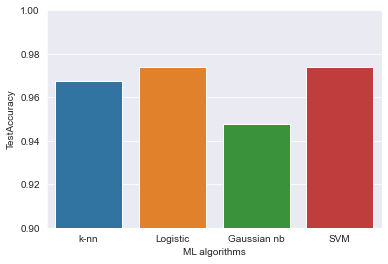

In [98]:

# read a titanic.csv file
# from seaborn library
plt.figure()

sb.set_style('darkgrid')
x=[float(ac1)/100,float(ac2)/100,float(ac3)/100,float(ac5)/100]
y=["k-nn","Logistic", "Gaussian nb", "SVM"]

svm=sb.barplot(y,x)
plt.ylim([0.90,1.0])
plt.xlabel("ML algorithms")
plt.ylabel("TestAccuracy")
plt.show()

figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
